# Module 5 - Modern Portfolio Theory

### Query 5.1 
For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean \* 252 , annual stdev = daily stdev \* sqrt(252) )**

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

infosys = pd.read_csv('INFY.csv')
infosys['Return'] = infosys['Close Price'].pct_change()*100
infosys.fillna(0,inplace=True)

mean_daily_return = infosys.Return.mean()
daily_std = infosys.Return.std()

infosys_annual_return = mean_daily_return * 252
infosys_volatility = daily_std * (252**(1/2))

print('Mean Daily Return =',mean_daily_return,'%\tDaily Standard Deviation =',daily_std, \
     '%\nExpected Annual Return =',infosys_annual_return,'%\tVolatility =',infosys_volatility,'%')

Mean Daily Return = -0.009315130825386805 %	Daily Standard Deviation = 2.631400941047034 %
Expected Annual Return = -2.347412967997475 %	Volatility = 41.77219493827072 %


### Query 5.2
Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [12]:
hdfc = pd.read_csv('HDFCBANK.csv')
reliance = pd.read_csv('RELIANCE.csv')
godrej = pd.read_csv('GODREJIND.csv')
tcs = pd.read_csv('TCS.csv')

infosys['Diff'] = infosys['Return'] - infosys['Return'].mean()

hdfc = hdfc[hdfc.Series == 'EQ'].reset_index(drop=True)
hdfc['Return'] = hdfc['Close Price'].pct_change()*100
hdfc.fillna(0,inplace =True)
hdfc['Diff'] = hdfc['Return'] - hdfc['Return'].mean()

reliance = reliance[reliance.Series == 'EQ'].reset_index(drop=True)
reliance['Return'] = reliance['Close Price'].pct_change()*100
reliance.fillna(0,inplace =True)
reliance['Diff'] = reliance['Return'] - reliance['Return'].mean()

godrej = godrej[godrej.Series == 'EQ'].reset_index(drop=True)
godrej['Return'] = godrej['Close Price'].pct_change()*100
godrej.fillna(0,inplace =True)
godrej['Diff'] = godrej['Return'] - godrej['Return'].mean()

tcs = tcs[tcs.Series == 'EQ'].reset_index(drop=True)
tcs['Return'] = tcs['Close Price'].pct_change()*100
tcs.fillna(0,inplace =True)
tcs['Diff'] = tcs['Return'] - tcs['Return'].mean()

d = dict()
l1 = [infosys,hdfc,reliance,godrej,tcs]
l2 = ['infosys','hfdc','reliance','godrej','tcs']
w = [0.2,0.2,0.2,0.2,0.2]

for i in range(len(l1)):
    l3 = [l1[i].Return.mean(), l1[i].Return.std(), l1[i].Return.mean() * 252, l1[i].Return.std() * (252**(1/2))]
    d[l2[i]] = l3
    
def annual_r(d,w):
    return sum([ d[l2[i]][2]*w[i] for i in range(len(d))])

def covariance(a,b):
    return ((a.Diff*b.Diff).sum()) / (len(a.Diff)-1)

def c_volatility(d,w):
    s = 0
    for i in range(len(l1)):
        s += ((w[i]*d[l2[i]][1])**2)
        for j in range(len(l1)):
            if i!=j:
                s += (w[i]*w[j]*covariance(l1[i],l1[j]))
    return s**(1/2)

annual_return = annual_r(d,w)
volatility = c_volatility(d,w)

print('Annual Return =',annual_return,'%\tVolatility =',volatility,'%')

Annual Return = 5.1427212270733405 %	Volatility = 1.1010281131380983 %


### Query 5.3 
Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [13]:
weights = []
for i in range(15,25):
    for j in range(15,25):
        for k in range(15,25):
            for l in range(15,25):
                if (i+j+k+l) <= 80:
                    m = 100-(i+j+k+l)
                    weights.append([i/100,j/100,k/100,l/100,m/100])

x = [c_volatility(d,i) for i in weights]
y = [annual_r(d,i) for i in weights]
ratio = [y[i]/x[i] for i in range(len(x))]

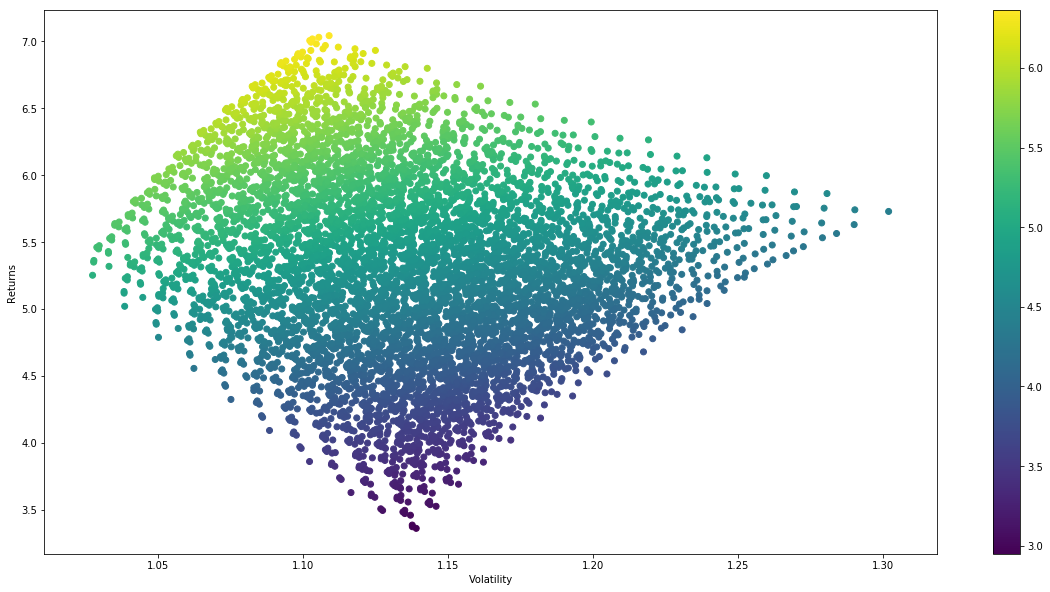

In [14]:
fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x,y,c=np.array(ratio))
plt.colorbar()
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

### Query 5.4 
Mark the 2 portfolios where -<br>
Portfolio 1 - The Sharpe ratio is the highest<br>
Portfolio 2 - The volatility is the lowest. 

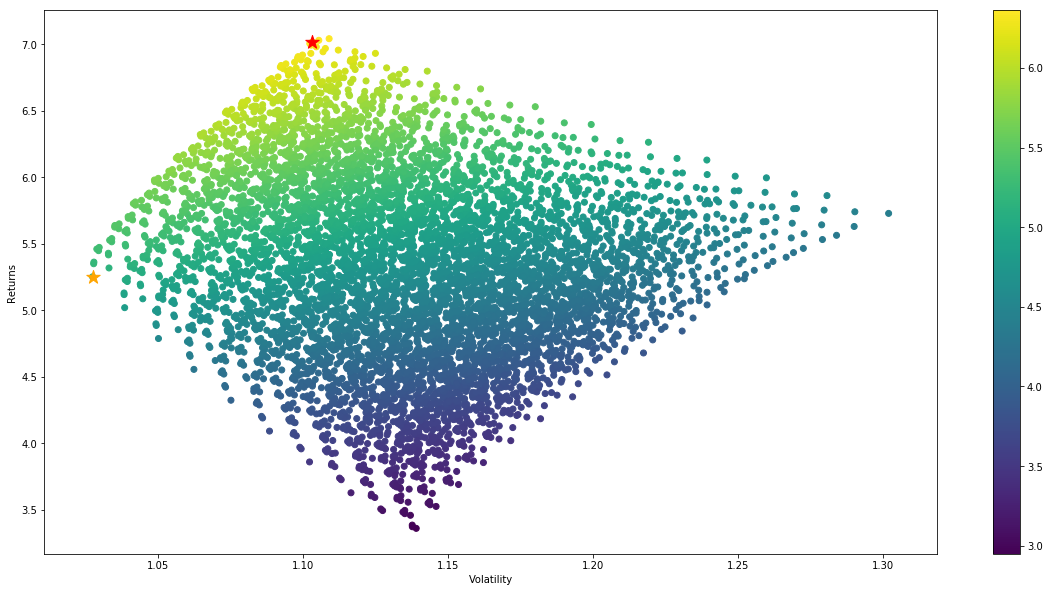

In [15]:
fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x,y,c=np.array(ratio))
plt.colorbar()
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.scatter(x[ratio.index(max(ratio))],y[ratio.index(max(ratio))],c='red',s=200,marker='*')
plt.scatter(min(x),y[x.index(min(x))],c='orange',s=200,marker='*')
plt.show()